In [45]:
from scipy import stats
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels
from numpy import array
import matplotlib
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib as pt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, auc, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [46]:
#Read in data
df =pd.read_csv('stroke_data.csv')
display(df)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [137]:
df.age.describe()

count    40910.000000
mean        51.327255
std         21.623969
min         -9.000000
25%         35.000000
50%         52.000000
75%         68.000000
max        103.000000
Name: age, dtype: float64

In [47]:
print(df.dtypes)

sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [48]:
df.shape

(40910, 11)

In [49]:
df.isnull().sum()


sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
# pd.crosstab(df.stroke, df.sex)

In [51]:
# # Creating some crosstab info for some of the remaining columns 
# ct1 = pd.crosstab(df.heart_disease,df.stroke)
# ct2 = pd.crosstab(df.hypertension,df.stroke)
# ct3 = pd.crosstab(df.ever_married,df.stroke)
# ct4 = pd.crosstab(df.smoking_status,df.stroke)

# # Setting the colors
# colors = ["steelblue","lawngreen"]

# # Setting up the figure and different axes on the figure
# fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
#                                           ncols=2, 
#                                           figsize=(20,10))

# # Plotting each crosstab on a different axis
# ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
# ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
# ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
# ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# # Setting x labels for heart_disease and hypertension
# ax1.set_xticklabels(["No","Yes"])
# ax2.set_xticklabels(["No","Yes"])

# # Changing the lables of the legend
# ax1.legend(labels=['No Stroke', 'Stroke'])
# ax2.legend(labels=['No Stroke', 'Stroke'])
# ax3.legend(labels=['No Stroke', 'Stroke'])
# ax4.legend(labels=['No Stroke', 'Stroke']);

In [52]:
### Your code goes here ###
### dropping columns with a minimum one value as null in the set.
df1=df.dropna(axis=0, how="any")
df1

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [53]:
df1.isnull().sum()


sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [54]:
df1.corr(method='pearson')

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.115259,-0.039178,-0.045350,-0.025981,0.003121,0.003715,-0.039357,-0.006016,-0.027994,-0.111036
age,-0.115259,1.000000,0.014364,0.024541,0.006295,0.003649,0.002689,0.027271,-0.012324,-0.002068,0.058536
hypertension,-0.039178,0.014364,1.000000,0.079954,0.033778,-0.033108,-0.002614,0.203475,0.082377,-0.017774,0.257156
heart_disease,-0.045350,0.024541,0.079954,1.000000,0.071610,0.049403,0.013028,0.252018,0.021367,0.137314,0.223911
ever_married,-0.025981,0.006295,0.033778,0.071610,1.000000,0.051574,-0.057197,0.160305,0.113677,0.137487,0.181698
work_type,0.003121,0.003649,-0.033108,0.049403,0.051574,1.000000,-0.011344,0.018213,0.074738,0.052889,0.026546
Residence_type,0.003715,0.002689,-0.002614,0.013028,-0.057197,-0.011344,1.000000,0.016496,0.037189,0.017632,0.011754
avg_glucose_level,-0.039357,0.027271,0.203475,0.252018,0.160305,0.018213,0.016496,1.000000,0.242813,0.056903,0.265403
bmi,-0.006016,-0.012324,0.082377,0.021367,0.113677,0.074738,0.037189,0.242813,1.000000,0.042469,0.018307
smoking_status,-0.027994,-0.002068,-0.017774,0.137314,0.137487,0.052889,0.017632,0.056903,0.042469,1.000000,0.068449


In [55]:
df1.corr(method='pearson')

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.115259,-0.039178,-0.045350,-0.025981,0.003121,0.003715,-0.039357,-0.006016,-0.027994,-0.111036
age,-0.115259,1.000000,0.014364,0.024541,0.006295,0.003649,0.002689,0.027271,-0.012324,-0.002068,0.058536
hypertension,-0.039178,0.014364,1.000000,0.079954,0.033778,-0.033108,-0.002614,0.203475,0.082377,-0.017774,0.257156
heart_disease,-0.045350,0.024541,0.079954,1.000000,0.071610,0.049403,0.013028,0.252018,0.021367,0.137314,0.223911
ever_married,-0.025981,0.006295,0.033778,0.071610,1.000000,0.051574,-0.057197,0.160305,0.113677,0.137487,0.181698
work_type,0.003121,0.003649,-0.033108,0.049403,0.051574,1.000000,-0.011344,0.018213,0.074738,0.052889,0.026546
Residence_type,0.003715,0.002689,-0.002614,0.013028,-0.057197,-0.011344,1.000000,0.016496,0.037189,0.017632,0.011754
avg_glucose_level,-0.039357,0.027271,0.203475,0.252018,0.160305,0.018213,0.016496,1.000000,0.242813,0.056903,0.265403
bmi,-0.006016,-0.012324,0.082377,0.021367,0.113677,0.074738,0.037189,0.242813,1.000000,0.042469,0.018307
smoking_status,-0.027994,-0.002068,-0.017774,0.137314,0.137487,0.052889,0.017632,0.056903,0.042469,1.000000,0.068449


<AxesSubplot:>

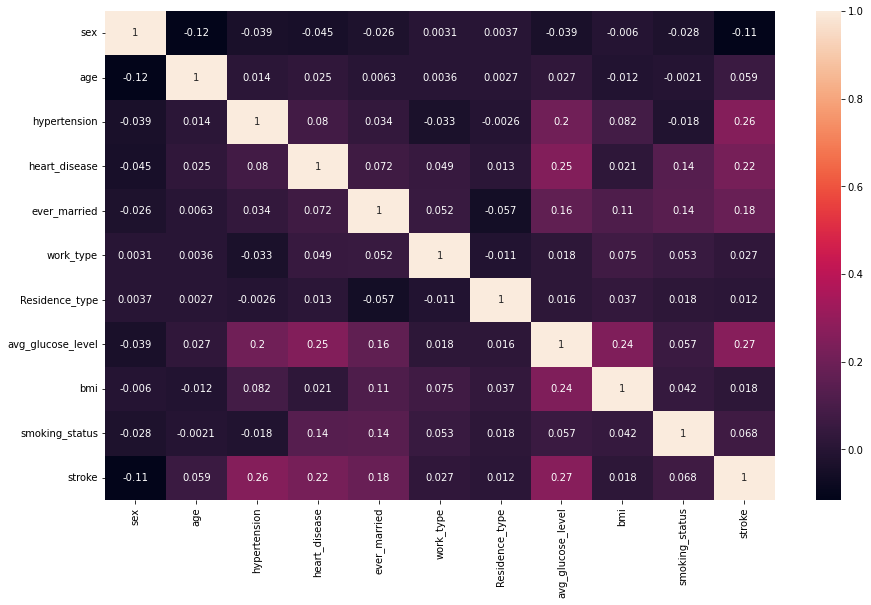

In [56]:
plt.figure(figsize = (15,9))
sns.heatmap(df1.corr(),annot=True)

In [138]:
df1.age.describe()

AttributeError: 'DataFrame' object has no attribute 'age'

In [57]:

# X = df1.drop('stroke', axis=1)
# y = df1['stroke']

# x=sm.add_constant(X)


# model = sm.OLS(y,x)
# model = model.fit()
# model.params

In [58]:
# model.summary()


In [59]:
# model.mse_resid

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# # Create a logistic regression model
# model = LogisticRegression()


In [62]:

# # Train the model on the training set
# model.fit(X_train, y_train)

In [63]:
# # Make predictions on the testing set
# y_pred = model.predict(X_test)


In [64]:

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [65]:
X=df1[['sex','hypertension','heart_disease','ever_married','avg_glucose_level','smoking_status']]
Y = df1['stroke']


X=sm.add_constant(X)

model1_bmi = sm.OLS(Y,X)
model1_bmi = model1_bmi.fit()
model1_bmi.params

const                0.143085
sex                 -0.086336
hypertension         0.250136
heart_disease        0.226005
ever_married         0.173816
avg_glucose_level    0.001387
smoking_status       0.021585
dtype: float64

In [66]:
model1_bmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     1338.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:26:24   Log-Likelihood:                -26023.
No. Observations:               40907   AIC:                         5.206e+04
Df Residuals:                   40900   BIC:                         5.212e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1431      0.007     19.182      0.000       0.128       0.158
sex                  -0.0863      0.005    -18.937      0.000      -0.095      -0.077
hypertension          0.2501      0.006     44.356      0.000       0.239       0.261
heart_disease         0.2260      0.007     31.994      0.000       0.212       0.240
ever_married          0.1738      0.006     28.821      0.000       0.162       0.186
avg_glucose_level     0.0014   4.18e-05     33.199      0.000       0.001       0.001
smoking_status        0.0216      0.005      4.685      0.000       0.013       0.031
==============================================================================
Omnibus:                   451421.178   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3264.564
Skew:                           0.049   Prob(JB):                         0.00
Kurtosis:                       1.620   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [90]:
models = pd.DataFrame(columns=["Model Name", "Accuracy"])

In [91]:
# model = LogisticRegression(max_iter=1000)

In [92]:
model_list = [("Logistic Regression", LogisticRegression(max_iter=200,random_state=100)), 
              ("Random Forest", RandomForestClassifier(random_state=100)),
         #      ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=100)),
             #  ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=100)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=100))]

In [93]:
for name, clf in model_list:
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(Y_test, predictions)
    
    new_row = {"Model Name": name, "Accuracy": score}
    models = models.append(new_row, ignore_index=True)

In [94]:
models.sort_values(by="Accuracy", ascending=False)

,Model Name,Accuracy
6,Decision Tree,0.998615
1,Random Forest,0.998126
5,KNN,0.995845
7,Bagging Classifier,0.993482
0,Logistic Regression,0.675141
3,Gaussian Naive Bayes,0.670659
4,Bernoulli Naive Bayes,0.655260
2,Support Vector Machines,0.617371


In [95]:
models = pd.DataFrame(columns=["Model Name", "AUC"])

In [96]:
for name, clf in model_list:
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions, Y_test)
    auc(fpr, tpr)
    
    new_row = {"Model Name": name, "AUC": auc(fpr, tpr)}
    models = models.append(new_row, ignore_index=True)

In [97]:
models.sort_values(by="AUC", ascending=False)

,Model Name,AUC
6,Decision Tree,0.998617
1,Random Forest,0.998130
5,KNN,0.995848
7,Bagging Classifier,0.993557
3,Gaussian Naive Bayes,0.680999
0,Logistic Regression,0.680033
4,Bernoulli Naive Bayes,0.659039
2,Support Vector Machines,0.648573


In [98]:
# plt.figure(figsize=(12, 7))
# sns.barplot(x=models["model"], y=models["AUC Value"])
# plt.title("Models AUC Values", size=12)
# plt.xticks(rotation=25)
# plt.show()

In [99]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:, 1], pos_label=1)
    
    score = roc_auc_score(Y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC AUC Score: (%0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={"size": 15})
    plt.show()

In [100]:
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [101]:
model_list = [("Logistic Regression", LogisticRegression(random_state=100)), 
              ("Random Forest", RandomForestClassifier(random_state=100)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=100)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=100))]

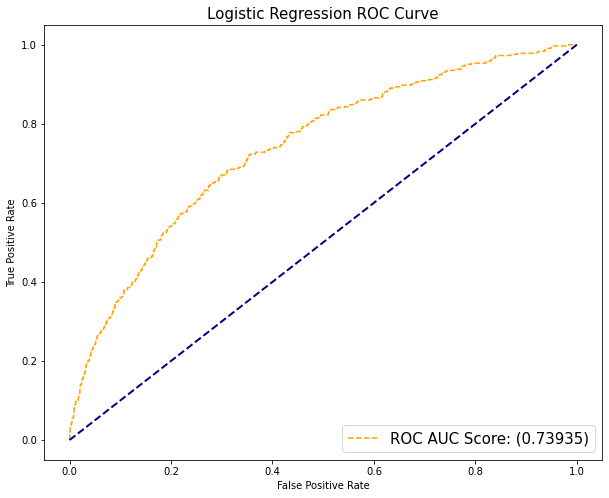

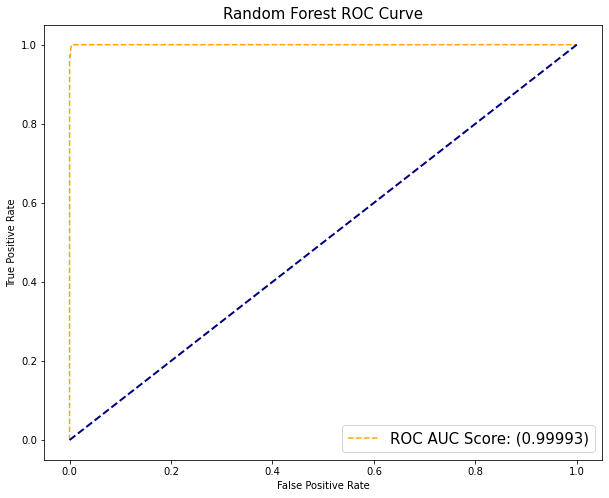

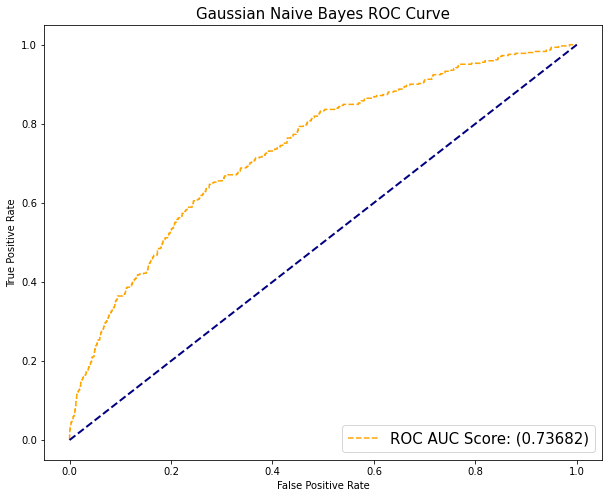

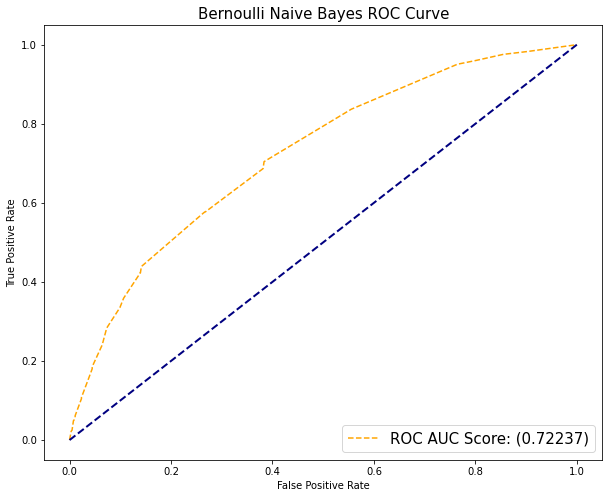

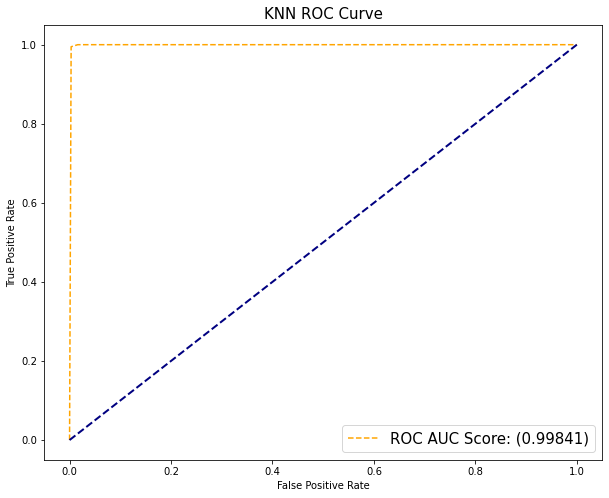

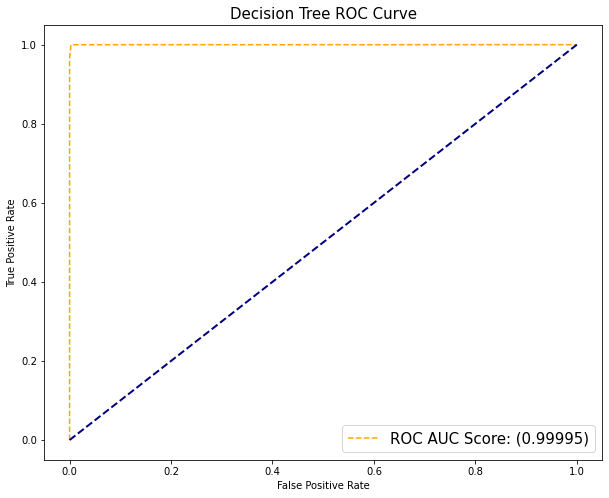

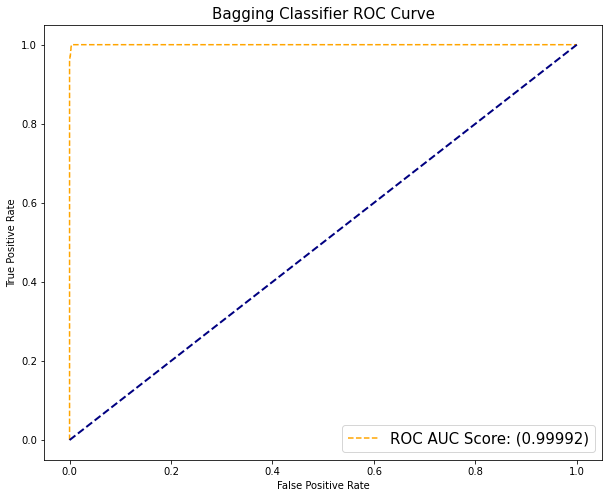

In [102]:
for name, clf in model_list:
    clf.fit(X_train, Y_train)
    visualize_roc_auc_curve(clf, name)

In [103]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

LogisticRegression()

In [104]:
Y_prediction = logistic_reg.predict(X_test)
Y_prediction

array([1, 1, 1, ..., 0, 1, 0])

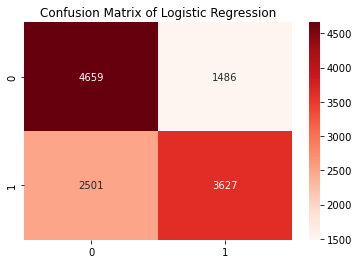

Confusion matrix of Logistic Model  : 
 [[4659 1486]
 [2501 3627]]


In [105]:
lrc = LogisticRegression(random_state=746)
lrc.fit(X_train, Y_train)
predictions = lrc.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix of Logistic Regression", size=12)
plt.show()
print("Confusion matrix of Logistic Model  : \n",confusion_matrix(Y_test, predictions))

In [106]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth':[10,11,12,13,14,15]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ......................max_depth=10;, score=0.870 total time=   0.7s
[CV 2/5] END ......................max_depth=10;, score=0.859 total time=   0.7s
[CV 3/5] END ......................max_depth=10;, score=0.863 total time=   0.7s
[CV 4/5] END ......................max_depth=10;, score=0.855 total time=   0.7s
[CV 5/5] END ......................max_depth=10;, score=0.872 total time=   0.7s
[CV 1/5] END ......................max_depth=11;, score=0.916 total time=   0.8s
[CV 2/5] END ......................max_depth=11;, score=0.897 total time=   0.8s
[CV 3/5] END ......................max_depth=11;, score=0.909 total time=   0.8s
[CV 4/5] END ......................max_depth=11;, score=0.895 total time=   0.8s
[CV 5/5] END ......................max_depth=11;, score=0.909 total time=   0.7s
[CV 1/5] END ......................max_depth=12;, score=0.932 total time=   0.8s
[CV 2/5] END ......................max_depth=12;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15]}, verbose=3)

In [107]:
print("Confusion matrix of Randomforest Model  : \n",confusion_matrix(Y_prediction,Y_test))

Confusion matrix of Randomforest Model  : 
 [[4659 2501]
 [1486 3627]]


In [108]:
from sklearn.model_selection import GridSearchCV
from  sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':[10,11,12,13,14,15]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................n_neighbors=10;, score=0.951 total time=   0.1s
[CV 2/5] END ....................n_neighbors=10;, score=0.957 total time=   0.1s
[CV 3/5] END ....................n_neighbors=10;, score=0.954 total time=   0.1s
[CV 4/5] END ....................n_neighbors=10;, score=0.950 total time=   0.1s
[CV 5/5] END ....................n_neighbors=10;, score=0.957 total time=   0.1s
[CV 1/5] END ....................n_neighbors=11;, score=0.940 total time=   0.1s
[CV 2/5] END ....................n_neighbors=11;, score=0.945 total time=   0.1s
[CV 3/5] END ....................n_neighbors=11;, score=0.943 total time=   0.1s
[CV 4/5] END ....................n_neighbors=11;, score=0.942 total time=   0.1s
[CV 5/5] END ....................n_neighbors=11;, score=0.949 total time=   0.1s
[CV 1/5] END ....................n_neighbors=12;, score=0.940 total time=   0.1s
[CV 2/5] END ....................n_neighbors=12;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15]}, verbose=3)

In [109]:
print("Confusion matrix of KNN Model : \n",confusion_matrix(Y_prediction,Y_test))


Confusion matrix of KNN Model : 
 [[4659 2501]
 [1486 3627]]


In [110]:
# Classification Report 
print(classification_report(Y_test,Y_train))

ValueError: Found input variables with inconsistent numbers of samples: [12273, 28634]

In [111]:
# Let's check out the confusion matrix 
plot_confusion_matrix(clf,X_test,Y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [113]:
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [124]:
# # Extract the input features and target variable
# X = df1[['sex', 'age', 'bmi']]
# y = df1['hypertension']

# # Create polynomial features up to degree 2
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Print the new feature names
# print(poly.get_feature_names(X.columns))

# # Use the new features as input to the model
# model.fit(X_poly, y)

In [125]:
bin_edges = [0, 30, 40, 50, 100]
# Define the bin labels
bin_labels = ['18-30', '30-40', '40-50', '50-60' '60+']

# Bin the age column
df1['age_group'] = pd.cut(df1['age'], bins=bin_edges, labels=bin_labels)

# Drop the original age column
df1.drop('age', axis=1, inplace=True)

KeyError: 'age'

In [126]:
df1.head()

,sex,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,1.0,0,1,1,4,1,228.69,36.6,1,1,50+
1,1.0,0,1,1,4,0,105.92,32.5,0,1,40-50
2,0.0,0,0,1,4,1,171.23,34.4,1,1,50+
3,1.0,1,0,1,3,0,174.12,24.0,0,1,40-50
4,1.0,0,0,1,4,1,186.21,29.0,1,1,50+
